<a href="https://colab.research.google.com/github/grupos4g4/AED/blob/main/Aplicando_Aula_7_AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Aplicando Conhecimento Aula 7 - Base de dados Grupo 3: Global Crop Yields (Brazil)***
##Alunos:
###Anderson Aparecido Alves
###Andréia dos Santos
###Gerson Soares Rodrigues
###Samuel Bonfim


Importação das Bibliotecas a que poderão ser utilizadas

In [1]:
# Importação das Bibliotecas a serem Utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from google.colab import files

Importação dos arquivos em formato csv para a criar os DataFrames necessários

In [2]:
df_key_crop_yields = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/key_crop_yields.csv')
df_fertilizer = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/cereal_crop_yield_vs_fertilizer_application.csv')
df_tractors = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/cereal_yields_vs_tractor_inputs_in_agriculture.csv')
df_land_use = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/land_use_vs_yield_change_in_cereal_production.csv')
df_arable_land = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/arable_land_pin.csv')



####  Principais rendimentos das colheitas em escala mundial

Valores brutos do dataframe dos principais rendimentos das colheitas em escala mundial com seus valores não-numéricos (NaN) convertidos em zero

In [3]:
df_key_crop_yields.fillna(0, inplace=True)
columns_to_fill = ['Wheat (tonnes per hectare)', 'Rice (tonnes per hectare)', 'Maize (tonnes per hectare)', 'Soybeans (tonnes per hectare)', 'Potatoes (tonnes per hectare)', 'Beans (tonnes per hectare)', 'Peas (tonnes per hectare)', 'Cassava (tonnes per hectare)', 'Barley (tonnes per hectare)', 'Cocoa beans (tonnes per hectare)', 'Bananas (tonnes per hectare)']
df_key_crop_yields[columns_to_fill] = df_key_crop_yields[columns_to_fill].fillna(0)
df_key_crop_yields.head()

,Entity,Code,Year,Wheat (tonnes per hectare),Rice (tonnes per hectare),Maize (tonnes per hectare),Soybeans (tonnes per hectare),Potatoes (tonnes per hectare),Beans (tonnes per hectare),Peas (tonnes per hectare),Cassava (tonnes per hectare),Barley (tonnes per hectare),Cocoa beans (tonnes per hectare),Bananas (tonnes per hectare)
0,Afghanistan,AFG,1961,1.0220,1.5190,1.4000,0.0,8.6667,0.0,0.0,0.0,1.0800,0.0,0.0
1,Afghanistan,AFG,1962,0.9735,1.5190,1.4000,0.0,7.6667,0.0,0.0,0.0,1.0800,0.0,0.0
2,Afghanistan,AFG,1963,0.8317,1.5190,1.4260,0.0,8.1333,0.0,0.0,0.0,1.0800,0.0,0.0
3,Afghanistan,AFG,1964,0.9510,1.7273,1.4257,0.0,8.6000,0.0,0.0,0.0,1.0857,0.0,0.0
4,Afghanistan,AFG,1965,0.9723,1.7273,1.4400,0.0,8.8000,0.0,0.0,0.0,1.0857,0.0,0.0


#  Principais rendimentos das colheitas referentes ao Brasil

Criação de um novo DataFrame dos principais rendimentos das colheitas com valores referentes somente ao Brasil

In [4]:
df_key_crop_yields_BR = df_key_crop_yields[df_key_crop_yields.Entity == 'Brazil']
df_key_crop_yields_BR

,Entity,Code,Year,Wheat (tonnes per hectare),Rice (tonnes per hectare),Maize (tonnes per hectare),Soybeans (tonnes per hectare),Potatoes (tonnes per hectare),Beans (tonnes per hectare),Peas (tonnes per hectare),Cassava (tonnes per hectare),Barley (tonnes per hectare),Cocoa beans (tonnes per hectare),Bananas (tonnes per hectare)
1527,Brazil,BRA,1961,0.5330,1.6989,1.3123,1.1269,5.6485,0.6760,0.0000,13.0732,0.7715,0.3287,14.5656
1528,Brazil,BRA,1962,0.9491,1.6589,1.3048,1.1005,5.7792,0.6295,0.0000,13.4422,0.9713,0.3020,14.9916
1529,Brazil,BRA,1963,0.4945,1.5423,1.3092,0.9503,5.8451,0.6513,0.0000,13.7523,0.6729,0.3055,14.7151
1530,Brazil,BRA,1964,0.8765,1.5171,1.1606,0.8478,6.0564,0.6231,0.0000,14.1944,0.9199,0.3155,15.4473
1531,Brazil,BRA,1965,0.7636,1.6410,1.3809,1.2115,6.1598,0.6997,0.0000,14.2818,0.8182,0.3334,15.2129
1532,Brazil,BRA,1966,0.8573,1.4487,1.3066,1.2125,6.6669,0.6461,0.0000,13.8836,0.8429,0.3793,14.8057
1533,Brazil,BRA,1967,0.7574,1.5828,1.3828,1.1691,6.7450,0.6979,0.0000,14.2434,0.7347,0.4115,16.3864
1534,Brazil,BRA,1968,0.8825,1.4919,1.3369,0.9066,7.0855,0.6605,0.0000,14.6148,0.8344,0.3451,16.3415
1535,Brazil,BRA,1969,0.9762,1.3838,1.3149,1.1661,6.8152,0.6055,0.0000,14.8193,1.0349,0.4825,17.6333
1536,Brazil,BRA,1970,0.9731,1.5169,1.4421,1.1439,7.3940,0.6346,0.0000,14.5534,1.0675,0.4439,18.4564


Renomeando as colunas de df_key_crop_yields_BR

In [5]:
from os import rename
df_key_crop_yields_BR = df_key_crop_yields_BR.rename(columns={'Wheat (tonnes per hectare)' : 'Trigo_Toneladas_por_Hectare','Soybeans (tonnes per hectare)':'Soja_Toneladas_por_Hectare', 'Rice (tonnes per hectare)' : 'Arroz_Toneladas_por_Hectare', 'Maize (tonnes per hectare)' : 'Milho_Toneladas_por_Hectare','Potatoes (tonnes per hectare)': 'Batata_Toneladas_por_Hectare', 'Beans (tonnes per hectare)': 'Feijão_Toneladas_por_Hectare', 'Peas (tonnes per hectare)':'Ervilha_Toneladas_por_Hectare','Cassava (tonnes per hectare)':'Mandioca_Toneladas_por_Hectare','Barley (tonnes per hectare)':'Cevada_Toneladas_por_Hectare','Cocoa beans (tonnes per hectare)': 'Cacau_Toneladas_por_Hectare','Bananas (tonnes per hectare)':'Banana_Toneladas_por_Hectare'})
df_key_crop_yields_BR

,Entity,Code,Year,Trigo_Toneladas_por_Hectare,Arroz_Toneladas_por_Hectare,Milho_Toneladas_por_Hectare,Soja_Toneladas_por_Hectare,Batata_Toneladas_por_Hectare,Feijão_Toneladas_por_Hectare,Ervilha_Toneladas_por_Hectare,Mandioca_Toneladas_por_Hectare,Cevada_Toneladas_por_Hectare,Cacau_Toneladas_por_Hectare,Banana_Toneladas_por_Hectare
1527,Brazil,BRA,1961,0.5330,1.6989,1.3123,1.1269,5.6485,0.6760,0.0000,13.0732,0.7715,0.3287,14.5656
1528,Brazil,BRA,1962,0.9491,1.6589,1.3048,1.1005,5.7792,0.6295,0.0000,13.4422,0.9713,0.3020,14.9916
1529,Brazil,BRA,1963,0.4945,1.5423,1.3092,0.9503,5.8451,0.6513,0.0000,13.7523,0.6729,0.3055,14.7151
1530,Brazil,BRA,1964,0.8765,1.5171,1.1606,0.8478,6.0564,0.6231,0.0000,14.1944,0.9199,0.3155,15.4473
1531,Brazil,BRA,1965,0.7636,1.6410,1.3809,1.2115,6.1598,0.6997,0.0000,14.2818,0.8182,0.3334,15.2129
1532,Brazil,BRA,1966,0.8573,1.4487,1.3066,1.2125,6.6669,0.6461,0.0000,13.8836,0.8429,0.3793,14.8057
1533,Brazil,BRA,1967,0.7574,1.5828,1.3828,1.1691,6.7450,0.6979,0.0000,14.2434,0.7347,0.4115,16.3864
1534,Brazil,BRA,1968,0.8825,1.4919,1.3369,0.9066,7.0855,0.6605,0.0000,14.6148,0.8344,0.3451,16.3415
1535,Brazil,BRA,1969,0.9762,1.3838,1.3149,1.1661,6.8152,0.6055,0.0000,14.8193,1.0349,0.4825,17.6333
1536,Brazil,BRA,1970,0.9731,1.5169,1.4421,1.1439,7.3940,0.6346,0.0000,14.5534,1.0675,0.4439,18.4564


Análise as colunas e indentifição de quais variáveis são categóricas e quais são númericas

In [6]:
df_key_crop_yields_BR.columns

Index(['Entity', 'Code', 'Year', 'Trigo_Toneladas_por_Hectare',
       'Arroz_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare',
       'Soja_Toneladas_por_Hectare', 'Batata_Toneladas_por_Hectare',
       'Feijão_Toneladas_por_Hectare', 'Ervilha_Toneladas_por_Hectare',
       'Mandioca_Toneladas_por_Hectare', 'Cevada_Toneladas_por_Hectare',
       'Cacau_Toneladas_por_Hectare', 'Banana_Toneladas_por_Hectare'],
      dtype='object')

Determinação dos valores de Medianas, Desvios Padrão, Mínimos, Máximos e Quartis

In [7]:
df_key_crop_yields_BR.describe().drop('count')

,Year,Trigo_Toneladas_por_Hectare,Arroz_Toneladas_por_Hectare,Milho_Toneladas_por_Hectare,Soja_Toneladas_por_Hectare,Batata_Toneladas_por_Hectare,Feijão_Toneladas_por_Hectare,Ervilha_Toneladas_por_Hectare,Mandioca_Toneladas_por_Hectare,Cevada_Toneladas_por_Hectare,Cacau_Toneladas_por_Hectare,Banana_Toneladas_por_Hectare
mean,1989.500000,1.503486,2.657841,2.544881,1.989005,15.254874,0.672602,1.193526,13.250717,1.750998,0.440969,13.434869
std,16.886879,0.678103,1.416821,1.297242,0.684077,7.669218,0.193194,1.179705,1.105578,0.884399,0.128095,2.216876
min,1961.000000,0.423700,1.297400,1.160600,0.847800,5.648500,0.384200,0.000000,10.599600,0.590400,0.278800,10.159400
25%,1975.250000,0.918575,1.516950,1.457775,1.456775,8.898775,0.508575,0.000000,12.354250,1.033175,0.333450,11.855000
50%,1989.500000,1.478950,2.039950,1.930900,1.829850,13.806550,0.645700,1.421150,13.442900,1.624450,0.397550,13.323100
75%,2003.750000,1.972600,3.357975,3.378500,2.531250,21.100000,0.791000,2.296775,14.122700,2.347850,0.512825,14.537125
max,2018.000000,3.155100,6.312300,5.618300,3.390300,31.176000,1.087400,3.440100,15.244500,4.169900,0.741500,21.493800


Verificando a existência de valores nulo no dataframe df_key_crop_yields_BR

In [8]:
df_key_crop_yields_BR.isnull().sum()

Entity                            0
Code                              0
Year                              0
Trigo_Toneladas_por_Hectare       0
Arroz_Toneladas_por_Hectare       0
Milho_Toneladas_por_Hectare       0
Soja_Toneladas_por_Hectare        0
Batata_Toneladas_por_Hectare      0
Feijão_Toneladas_por_Hectare      0
Ervilha_Toneladas_por_Hectare     0
Mandioca_Toneladas_por_Hectare    0
Cevada_Toneladas_por_Hectare      0
Cacau_Toneladas_por_Hectare       0
Banana_Toneladas_por_Hectare      0
dtype: int64

# Dataframe Referente aos Fertilizantes

Valores brutos do dataframe referente aos Fertilizantes, com seus valores NaN convertidos em zero

In [9]:
df_fertilizer.fillna(0, inplace=True)
columns_to_fill = ['Nitrogen fertilizer use (kilograms per hectare)']
df_fertilizer[columns_to_fill] = df_fertilizer[columns_to_fill].fillna(0)
df_fertilizer.head()

,Entity,Code,Year,Cereal yield (tonnes per hectare),Nitrogen fertilizer use (kilograms per hectare)
0,Afghanistan,AFG,1961,1.1151,0.0
1,Afghanistan,AFG,1962,1.0790,0.0
2,Afghanistan,AFG,1963,0.9858,0.0
3,Afghanistan,AFG,1964,1.0828,0.0
4,Afghanistan,AFG,1965,1.0989,0.0


Criação de um novo dataframe, em que apenas estarão contidos os valores referentes ao Brasil

In [10]:
df_fertilizer_BR = df_fertilizer[df_fertilizer.Entity == 'Brazil']
df_fertilizer_BR

,Entity,Code,Year,Cereal yield (tonnes per hectare),Nitrogen fertilizer use (kilograms per hectare)
1353,Brazil,BRA,1961,1.3463,0.00
1354,Brazil,BRA,1962,1.3815,0.00
1355,Brazil,BRA,1963,1.3224,0.00
1356,Brazil,BRA,1964,1.2564,0.00
1357,Brazil,BRA,1965,1.4283,0.00
1358,Brazil,BRA,1966,1.3213,0.00
1359,Brazil,BRA,1967,1.4022,0.00
1360,Brazil,BRA,1968,1.3505,0.00
1361,Brazil,BRA,1969,1.3028,0.00
1362,Brazil,BRA,1970,1.4088,0.00


Renomeando as colunas de df_fertilizer_BR

In [11]:
from os import rename
df_fertilizer_BR = df_fertilizer_BR.rename(columns={'Cereal yield (tonnes per hectare)':'Rendimento_de_cereais_Ton_por_Hec ','Nitrogen fertilizer use (kilograms per hectare)':'Fertlizantes_Nitrogenados_Kg_por_Hec'})
df_fertilizer_BR

,Entity,Code,Year,Rendimento_de_cereais_Ton_por_Hec,Fertlizantes_Nitrogenados_Kg_por_Hec
1353,Brazil,BRA,1961,1.3463,0.00
1354,Brazil,BRA,1962,1.3815,0.00
1355,Brazil,BRA,1963,1.3224,0.00
1356,Brazil,BRA,1964,1.2564,0.00
1357,Brazil,BRA,1965,1.4283,0.00
1358,Brazil,BRA,1966,1.3213,0.00
1359,Brazil,BRA,1967,1.4022,0.00
1360,Brazil,BRA,1968,1.3505,0.00
1361,Brazil,BRA,1969,1.3028,0.00
1362,Brazil,BRA,1970,1.4088,0.00


Verificando os tipos de variáveis presentes no dataframe df_fertilizer_BR

In [12]:
df_fertilizer_BR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 1353 to 1410
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                58 non-null     object 
 1   Code                                  58 non-null     object 
 2   Year                                  58 non-null     int64  
 3   Rendimento_de_cereais_Ton_por_Hec     58 non-null     float64
 4   Fertlizantes_Nitrogenados_Kg_por_Hec  58 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ KB


Determinação dos valores de Medianas, Desvios Padrão, Mínimos, Máximos e Quartis

In [13]:
df_fertilizer_BR.describe().drop('count')

,Year,Rendimento_de_cereais_Ton_por_Hec,Fertlizantes_Nitrogenados_Kg_por_Hec
mean,1989.500000,2.407740,14.529655
std,16.886879,1.178046,24.822412
min,1961.000000,1.210100,0.000000
25%,1975.250000,1.415850,0.000000
50%,1989.500000,1.870450,0.000000
75%,2003.750000,3.143650,36.385000
max,2018.000000,5.209500,81.630000


Verificando a existência de valores nulos no dataframe df_fertilizer_BR

In [14]:
df_fertilizer_BR.isnull().sum()

Entity                                  0
Code                                    0
Year                                    0
Rendimento_de_cereais_Ton_por_Hec       0
Fertlizantes_Nitrogenados_Kg_por_Hec    0
dtype: int64

# Dataframe referente aos Maquinários (Tratores)

Valores brutos do dataframe referente aos Maquinários (Tratores), com seus valores NaN convertidos em zero

In [15]:
df_tractors.columns = df_tractors.columns.str.replace(' ', '_')

df_tractors['Tractors_per_100_sq_km_arable_land'].fillna(0, inplace=True)
df_tractors['Cereal_yield_(kilograms_per_hectare)_(kg_per_hectare)'].fillna(0, inplace=True)

df_tractors.head()



,Entity,Code,Year,Tractors_per_100_sq_km_arable_land,Cereal_yield_(kilograms_per_hectare)_(kg_per_hectare),Total_population_(Gapminder)
0,Afghanistan,AFG,1961,0.156863,1115.1,9169000.0
1,Afghanistan,AFG,1962,0.194805,1079.0,9351000.0
2,Afghanistan,AFG,1963,0.258065,985.8,9543000.0
3,Afghanistan,AFG,1964,0.256410,1082.8,9745000.0
4,Afghanistan,AFG,1965,0.384615,1098.9,9956000.0


Criação de um novo dataframe, em que apenas estarão contidos os valores referentes ao Brasil

In [16]:
df_tractors_BR = df_tractors[df_tractors.Entity == 'Brazil']
df_tractors_BR

,Entity,Code,Year,Tractors_per_100_sq_km_arable_land,Cereal_yield_(kilograms_per_hectare)_(kg_per_hectare),Total_population_(Gapminder)
5710,Brazil,BRA,1961,32.552672,1346.3,74311000.0
5711,Brazil,BRA,1962,34.166667,1381.5,76514000.0
5712,Brazil,BRA,1963,35.769231,1322.4,78773000.0
5713,Brazil,BRA,1964,38.148148,1256.4,81065000.0
5714,Brazil,BRA,1965,40.714286,1428.3,83374000.0
...,...,...,...,...,...,...
5925,Brazil,BRA,1959,0.000000,0.0,70123000.0
5926,Brazil,BRA,1960,0.000000,0.0,72179000.0
5927,Brazil,BRA,2017,0.000000,0.0,207834000.0
5928,Brazil,BRA,2018,0.000000,0.0,209468992.0


Renomeando as colunas de df_tractor_BR

In [17]:
from os import rename
df_tractors_BR = df_tractors_BR.rename(columns={'Tractors_per_100_sq_km_arable_land':'Tratores_por_100Km²_terra_aravel','Cereal_yield_(kilograms_per_hectare)_(kg_per_hectare)':'Rendimento_Cereal_Kg_por_Hec', 'Total_population_(Gapminder)': 'Populacao_Total'})
df_tractors_BR

,Entity,Code,Year,Tratores_por_100Km²_terra_aravel,Rendimento_Cereal_Kg_por_Hec,Populacao_Total
5710,Brazil,BRA,1961,32.552672,1346.3,74311000.0
5711,Brazil,BRA,1962,34.166667,1381.5,76514000.0
5712,Brazil,BRA,1963,35.769231,1322.4,78773000.0
5713,Brazil,BRA,1964,38.148148,1256.4,81065000.0
5714,Brazil,BRA,1965,40.714286,1428.3,83374000.0
...,...,...,...,...,...,...
5925,Brazil,BRA,1959,0.000000,0.0,70123000.0
5926,Brazil,BRA,1960,0.000000,0.0,72179000.0
5927,Brazil,BRA,2017,0.000000,0.0,207834000.0
5928,Brazil,BRA,2018,0.000000,0.0,209468992.0


Verificando os tipos de variáveis presentes no dataframe df_tractors_BR

In [18]:
df_tractors_BR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 5710 to 5929
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            220 non-null    object 
 1   Code                              220 non-null    object 
 2   Year                              220 non-null    object 
 3   Tratores_por_100Km²_terra_aravel  220 non-null    float64
 4   Rendimento_Cereal_Kg_por_Hec      220 non-null    float64
 5   Populacao_Total                   220 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.1+ KB


Determinação dos valores de Medianas, Desvios Padrão, Mínimos, Máximos e Quartis

In [19]:
df_tractors_BR.describe().drop('count')

,Tratores_por_100Km²_terra_aravel,Rendimento_Cereal_Kg_por_Hec,Populacao_Total
mean,21.368193,589.240000,5.334007e+07
std,45.792193,1148.191707,6.235275e+07
min,0.000000,0.000000,3.639636e+06
25%,0.000000,0.000000,7.809262e+06
50%,0.000000,0.000000,2.217978e+07
75%,0.000000,1221.675000,8.164225e+07
max,147.645085,5000.700000,2.110500e+08


Verificando se há os valores nulos em df_tractors_BR

In [20]:
df_tractors_BR.isnull().sum()

Entity                              0
Code                                0
Year                                0
Tratores_por_100Km²_terra_aravel    0
Rendimento_Cereal_Kg_por_Hec        0
Populacao_Total                     0
dtype: int64

# Dataframe referente aos Uso de terra

Valores brutos do dataframe referente aos Uso da terra, com seus valores NaN convertidos em zero

In [21]:
df_land_use.columns = df_land_use.columns.str.replace(' ', '_')

df_land_use['Change_to_land_area_used_for_cereal_production_since_1961'].fillna(0, inplace=True)
df_land_use['Cereal_yield_index'].fillna(0, inplace=True)

df_land_use.head()

,Entity,Code,Year,Cereal_yield_index,Change_to_land_area_used_for_cereal_production_since_1961,Total_population_(Gapminder)
0,Afghanistan,AFG,1961,100.0,100.0,9169000.0
1,Afghanistan,AFG,1962,97.0,103.0,9351000.0
2,Afghanistan,AFG,1963,88.0,103.0,9543000.0
3,Afghanistan,AFG,1964,97.0,104.0,9745000.0
4,Afghanistan,AFG,1965,99.0,104.0,9956000.0


Criação de um novo dataframe, em que apenas estarão contidos os valores referentes ao Brasil

In [22]:
df_land_use_BR = df_land_use[df_land_use.Entity == 'Brazil']
df_land_use_BR

,Entity,Code,Year,Cereal_yield_index,Change_to_land_area_used_for_cereal_production_since_1961,Total_population_(Gapminder)
5708,Brazil,BRA,1961,100.0,100.0,74311000.0
5709,Brazil,BRA,1962,103.0,103.0,76514000.0
5710,Brazil,BRA,1963,98.0,113.0,78773000.0
5711,Brazil,BRA,1964,93.0,117.0,81065000.0
5712,Brazil,BRA,1965,106.0,128.0,83374000.0
...,...,...,...,...,...,...
5923,Brazil,BRA,2015,0.0,0.0,204472000.0
5924,Brazil,BRA,2016,0.0,0.0,206163008.0
5925,Brazil,BRA,2017,0.0,0.0,207834000.0
5926,Brazil,BRA,2018,0.0,0.0,209468992.0


Renomeando as colunas presentes em df_land_use_BR

In [23]:
from os import rename
df_land_use_BR = df_land_use_BR.rename(columns={'Cereal_yield_index':'Indice_Rendimentos_Cereal','Change_to_land_area_used_for_cereal_production_since_1961':'Alteracao_Area_Prod', 'Total_population_(Gapminder)': 'Populacao_Total'})
df_tractors_BR

,Entity,Code,Year,Tratores_por_100Km²_terra_aravel,Rendimento_Cereal_Kg_por_Hec,Populacao_Total
5710,Brazil,BRA,1961,32.552672,1346.3,74311000.0
5711,Brazil,BRA,1962,34.166667,1381.5,76514000.0
5712,Brazil,BRA,1963,35.769231,1322.4,78773000.0
5713,Brazil,BRA,1964,38.148148,1256.4,81065000.0
5714,Brazil,BRA,1965,40.714286,1428.3,83374000.0
...,...,...,...,...,...,...
5925,Brazil,BRA,1959,0.000000,0.0,70123000.0
5926,Brazil,BRA,1960,0.000000,0.0,72179000.0
5927,Brazil,BRA,2017,0.000000,0.0,207834000.0
5928,Brazil,BRA,2018,0.000000,0.0,209468992.0


Verificando os tipos de variáveis presentes em df_land_use_BR

In [24]:
df_land_use_BR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 5708 to 5927
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     220 non-null    object 
 1   Code                       220 non-null    object 
 2   Year                       220 non-null    object 
 3   Indice_Rendimentos_Cereal  220 non-null    float64
 4   Alteracao_Area_Prod        220 non-null    float64
 5   Populacao_Total            220 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.1+ KB


Determinação dos valores de Medianas, Desvios Padrão, Mínimos, Máximos e Quartis

In [25]:
df_land_use_BR.describe().drop('count')

,Indice_Rendimentos_Cereal,Alteracao_Area_Prod,Populacao_Total
mean,40.731818,40.686364,5.334007e+07
std,80.522131,72.594305,6.235275e+07
min,0.000000,0.000000,3.639636e+06
25%,0.000000,0.000000,7.809262e+06
50%,0.000000,0.000000,2.217978e+07
75%,0.000000,0.000000,8.164225e+07
max,358.000000,210.000000,2.110500e+08


Verificando se existem valores nulo em df_land_use_BR

In [26]:
df_land_use_BR.isnull().sum()

Entity                       0
Code                         0
Year                         0
Indice_Rendimentos_Cereal    0
Alteracao_Area_Prod          0
Populacao_Total              0
dtype: int64

# Dataframe referente ao Solo arável

Valores brutos do dataframe referente aos Uso da terra, como, posteriormente, utilizaremos somentes os valores do Brasil seus valores NaN não foram convertidos em zero, devido não haver a presença destes nos valores

In [27]:
df_arable_land.head()

,Entity,Code,Year,Arable land needed to produce a fixed quantity of crops ((1.0 = 1961))
0,Afghanistan,AFG,1961,1.000000
1,Afghanistan,AFG,1962,0.984298
2,Afghanistan,AFG,1963,1.014870
3,Afghanistan,AFG,1964,0.939171
4,Afghanistan,AFG,1965,0.907330


Selecionando nas colunas de df_arable_land_BR em que estão contidos somente os valores do Brasil

In [28]:
df_arable_land_BR = df_arable_land[df_arable_land.Entity == 'Brazil']
df_arable_land_BR

,Entity,Code,Year,Arable land needed to produce a fixed quantity of crops ((1.0 = 1961))
1242,Brazil,BRA,1961,1.000000
1243,Brazil,BRA,1962,1.025271
1244,Brazil,BRA,1963,1.103997
1245,Brazil,BRA,1964,1.162857
1246,Brazil,BRA,1965,1.007477
1247,Brazil,BRA,1966,1.138707
1248,Brazil,BRA,1967,1.069580
1249,Brazil,BRA,1968,1.138959
1250,Brazil,BRA,1969,1.143652
1251,Brazil,BRA,1970,1.185291


Renomeando as colunas do dataframe df_arable_land_BR

In [29]:
from os import rename
df_arable_land_BR = df_arable_land_BR.rename(columns={'Arable land needed to produce a fixed quantity of crops ((1.0 = 1961))':'Terra_arável_necessária_para_produzir_quant_fixa_culturas'})
df_arable_land_BR

,Entity,Code,Year,Terra_arável_necessária_para_produzir_quant_fixa_culturas
1242,Brazil,BRA,1961,1.000000
1243,Brazil,BRA,1962,1.025271
1244,Brazil,BRA,1963,1.103997
1245,Brazil,BRA,1964,1.162857
1246,Brazil,BRA,1965,1.007477
1247,Brazil,BRA,1966,1.138707
1248,Brazil,BRA,1967,1.069580
1249,Brazil,BRA,1968,1.138959
1250,Brazil,BRA,1969,1.143652
1251,Brazil,BRA,1970,1.185291


Informações de df_arable_land_BR

In [30]:
df_arable_land_BR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1242 to 1295
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     54 non-null     object 
 1   Code                                                       54 non-null     object 
 2   Year                                                       54 non-null     int64  
 3   Terra_arável_necessária_para_produzir_quant_fixa_culturas  54 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ KB


Verificando os nomes presentes nas colunas de df_arable_land_BR

In [31]:
df_arable_land_BR.columns

Index(['Entity', 'Code', 'Year',
       'Terra_arável_necessária_para_produzir_quant_fixa_culturas'],
      dtype='object')

Determinação dos valores de Medianas, Desvios Padrão, Mínimos, Máximos e Quartis e retirando valores não nulos ('count') da contagem

In [32]:
df_arable_land_BR.describe().drop('count')

,Year,Terra_arável_necessária_para_produzir_quant_fixa_culturas
mean,1987.500000,0.919904
std,15.732133,0.202266
min,1961.000000,0.563289
25%,1974.250000,0.760557
50%,1987.500000,0.909849
75%,2000.750000,1.119932
max,2014.000000,1.255401


Verificando se existem variáveis nulas em df_arable_land_BR

In [33]:
df_arable_land_BR.isnull().sum()

Entity                                                       0
Code                                                         0
Year                                                         0
Terra_arável_necessária_para_produzir_quant_fixa_culturas    0
dtype: int64

# **Criação de Merges (Junção) entre os dataframes**

Para a execução dos Merges, recomenda-se executar somente aqueles que não se repetem, devido a ocorrência de conflitos durante a execução

## Merge entre df_key_crop_yields_BR e df_arable_land_BR

In [34]:
df_key_crop_yields_BR = pd.merge(df_key_crop_yields_BR,df_arable_land_BR,on=['Entity','Code','Year'])
df_key_crop_yields_BR.head()

,Entity,Code,Year,Trigo_Toneladas_por_Hectare,Arroz_Toneladas_por_Hectare,Milho_Toneladas_por_Hectare,Soja_Toneladas_por_Hectare,Batata_Toneladas_por_Hectare,Feijão_Toneladas_por_Hectare,Ervilha_Toneladas_por_Hectare,Mandioca_Toneladas_por_Hectare,Cevada_Toneladas_por_Hectare,Cacau_Toneladas_por_Hectare,Banana_Toneladas_por_Hectare,Terra_arável_necessária_para_produzir_quant_fixa_culturas
0,Brazil,BRA,1961,0.5330,1.6989,1.3123,1.1269,5.6485,0.6760,0.0,13.0732,0.7715,0.3287,14.5656,1.000000
1,Brazil,BRA,1962,0.9491,1.6589,1.3048,1.1005,5.7792,0.6295,0.0,13.4422,0.9713,0.3020,14.9916,1.025271
2,Brazil,BRA,1963,0.4945,1.5423,1.3092,0.9503,5.8451,0.6513,0.0,13.7523,0.6729,0.3055,14.7151,1.103997
3,Brazil,BRA,1964,0.8765,1.5171,1.1606,0.8478,6.0564,0.6231,0.0,14.1944,0.9199,0.3155,15.4473,1.162857
4,Brazil,BRA,1965,0.7636,1.6410,1.3809,1.2115,6.1598,0.6997,0.0,14.2818,0.8182,0.3334,15.2129,1.007477


Informações dos tipos de variáveis presentes em df_key_crop_yields_BR

In [35]:
df_key_crop_yields_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 15 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     54 non-null     object 
 1   Code                                                       54 non-null     object 
 2   Year                                                       54 non-null     int64  
 3   Trigo_Toneladas_por_Hectare                                54 non-null     float64
 4   Arroz_Toneladas_por_Hectare                                54 non-null     float64
 5   Milho_Toneladas_por_Hectare                                54 non-null     float64
 6   Soja_Toneladas_por_Hectare                                 54 non-null     float64
 7   Batata_Toneladas_por_Hectare                               54 non-null     float64
 8   Feijão_Tonel

Verificando valores nulos em  df_key_crop_yields_BR

In [ ]:
df_key_crop_yields_BR.isnull().sum()

## Merge entre os dataframes df_land_use_BR e df_tractors_BR

In [36]:
df_land_use_BR = pd.merge(df_land_use_BR,df_tractors_BR,on=['Entity','Code','Year'])
df_land_use_BR.head()

,Entity,Code,Year,Indice_Rendimentos_Cereal,Alteracao_Area_Prod,Populacao_Total_x,Tratores_por_100Km²_terra_aravel,Rendimento_Cereal_Kg_por_Hec,Populacao_Total_y
0,Brazil,BRA,1961,100.0,100.0,74311000.0,32.552672,1346.3,74311000.0
1,Brazil,BRA,1962,103.0,103.0,76514000.0,34.166667,1381.5,76514000.0
2,Brazil,BRA,1963,98.0,113.0,78773000.0,35.769231,1322.4,78773000.0
3,Brazil,BRA,1964,93.0,117.0,81065000.0,38.148148,1256.4,81065000.0
4,Brazil,BRA,1965,106.0,128.0,83374000.0,40.714286,1428.3,83374000.0


Devido a duplicação de algumas colunas, foram feitos tratamentos nestas como:
*   Remover uma das colunas duplicadas, no caso, as terminadas em y;
*   Renomear as colunas retirando o x do final delas

In [37]:
df_land_use_BR = df_land_use_BR.drop(columns=[col for col in df_land_use_BR.columns if col.endswith('_y')])
df_land_use_BR.rename(columns={'Populacao_Total_x': 'Populacao_Total' , 'Tratores_por_100Km²_terra_aravel_x': 'Tratores_por_100Km²_terra_aravel', 'Rendimento_Cereal_Kg_por_Hec_x': 'Rendimento_Cereal_Kg_por_Hec'}, inplace=True)

Informações referentes as colunas presentes no dataframe de df_land_use_BR

In [38]:
df_land_use_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            220 non-null    object 
 1   Code                              220 non-null    object 
 2   Year                              220 non-null    object 
 3   Indice_Rendimentos_Cereal         220 non-null    float64
 4   Alteracao_Area_Prod               220 non-null    float64
 5   Populacao_Total                   220 non-null    float64
 6   Tratores_por_100Km²_terra_aravel  220 non-null    float64
 7   Rendimento_Cereal_Kg_por_Hec      220 non-null    float64
dtypes: float64(5), object(3)
memory usage: 13.9+ KB


## ***Determinação dos valores de Medianas, Desvios Padrão, Mínimos, Máximos e Quartis***

In [39]:
df_key_crop_yields_BR.describe().drop('count')

,Year,Trigo_Toneladas_por_Hectare,Arroz_Toneladas_por_Hectare,Milho_Toneladas_por_Hectare,Soja_Toneladas_por_Hectare,Batata_Toneladas_por_Hectare,Feijão_Toneladas_por_Hectare,Ervilha_Toneladas_por_Hectare,Mandioca_Toneladas_por_Hectare,Cevada_Toneladas_por_Hectare,Cacau_Toneladas_por_Hectare,Banana_Toneladas_por_Hectare,Terra_arável_necessária_para_produzir_quant_fixa_culturas
mean,1987.500000,1.424380,2.415048,2.352915,1.901111,14.142361,0.644543,1.075643,13.129326,1.657087,0.445730,13.357233,0.919904
std,15.732133,0.625904,1.130950,1.115539,0.621056,6.702443,0.168620,1.122183,1.044605,0.815776,0.130951,2.277905,0.202266
min,1961.000000,0.423700,1.297400,1.160600,0.847800,5.648500,0.384200,0.000000,10.599600,0.590400,0.278800,10.159400,0.563289
25%,1974.250000,0.891975,1.515850,1.440975,1.402775,8.664625,0.503675,0.000000,12.312825,1.021500,0.333450,11.835275,0.760557
50%,1987.500000,1.438050,1.889150,1.869850,1.781000,13.254850,0.636300,0.623900,13.248400,1.526550,0.398650,12.915100,0.909849
75%,2000.750000,1.816400,3.198075,2.979325,2.367625,18.170100,0.709675,2.250100,13.994900,2.240775,0.549675,14.537125,1.119932
max,2014.000000,2.828800,5.201300,5.253600,3.121400,27.941000,1.034200,2.753000,14.827700,3.744100,0.741500,21.493800,1.255401


In [43]:
df_fertilizer_BR.describe().drop('count')

,Year,Rendimento_de_cereais_Ton_por_Hec,Fertlizantes_Nitrogenados_Kg_por_Hec
mean,1989.500000,2.407740,14.529655
std,16.886879,1.178046,24.822412
min,1961.000000,1.210100,0.000000
25%,1975.250000,1.415850,0.000000
50%,1989.500000,1.870450,0.000000
75%,2003.750000,3.143650,36.385000
max,2018.000000,5.209500,81.630000


In [42]:
df_tractors_BR.describe().drop('count')

,Tratores_por_100Km²_terra_aravel,Rendimento_Cereal_Kg_por_Hec,Populacao_Total
mean,21.368193,589.240000,5.334007e+07
std,45.792193,1148.191707,6.235275e+07
min,0.000000,0.000000,3.639636e+06
25%,0.000000,0.000000,7.809262e+06
50%,0.000000,0.000000,2.217978e+07
75%,0.000000,1221.675000,8.164225e+07
max,147.645085,5000.700000,2.110500e+08


In [44]:
df_land_use_BR.describe().drop('count')

,Indice_Rendimentos_Cereal,Alteracao_Area_Prod,Populacao_Total,Tratores_por_100Km²_terra_aravel,Rendimento_Cereal_Kg_por_Hec
mean,40.731818,40.686364,5.334007e+07,21.368193,589.240000
std,80.522131,72.594305,6.235275e+07,45.792193,1148.191707
min,0.000000,0.000000,3.639636e+06,0.000000,0.000000
25%,0.000000,0.000000,7.809262e+06,0.000000,0.000000
50%,0.000000,0.000000,2.217978e+07,0.000000,0.000000
75%,0.000000,0.000000,8.164225e+07,0.000000,1221.675000
max,358.000000,210.000000,2.110500e+08,147.645085,5000.700000


In [45]:
df_arable_land_BR.describe().drop('count')

,Year,Terra_arável_necessária_para_produzir_quant_fixa_culturas
mean,1987.500000,0.919904
std,15.732133,0.202266
min,1961.000000,0.563289
25%,1974.250000,0.760557
50%,1987.500000,0.909849
75%,2000.750000,1.119932
max,2014.000000,1.255401


# **Plot de Gráficos em Linhas**

## Toneladas por Hectares por Ano dos diferentes tipos de culturas no Brasil

Para o gráfico, feito apartir do merge dos dataframes df_key_crops_yields_BR e df_arable_land_BR, e para não ficar muito poluído e afetar na medição dos valores, foram medidas somente as principais culturas de produção que o Brasil mais produz e destas as que estão presentes nas colunas são: Arroz, Milho, Soja e Feijão

In [ ]:
print(df_key_crop_yields_BR.columns)

if 'Rendimento_de_cereais_Ton_por_Hec' in df_key_crop_yields_BR.columns:
    print("Coluna existe")
else:
    print("Coluna não existe")

plt.figure(figsize=(12, 6))

sns.lineplot(x=df_key_crop_yields_BR['Year'], y=df_key_crop_yields_BR['Arroz_Toneladas_por_Hectare'], label='Quantidade de Arroz')
sns.lineplot(x=df_key_crop_yields_BR['Year'], y=df_key_crop_yields_BR['Milho_Toneladas_por_Hectare'], label='Quantidade de Milho')
sns.lineplot(x=df_key_crop_yields_BR['Year'], y=df_key_crop_yields_BR['Soja_Toneladas_por_Hectare'], label='Quantidade de Soja')
sns.lineplot(x=df_key_crop_yields_BR['Year'], y=df_key_crop_yields_BR['Feijão_Toneladas_por_Hectare'], label='Quantidade de Feijão')
sns.lineplot(x=df_key_crop_yields_BR['Year'], y=df_key_crop_yields_BR['Terra_arável_necessária_para_produzir_quant_fixa_culturas'], label='Solo arável necessário para plantio')

if 'Rendimento_de_cereais_Ton_por_Hec' in df_key_crop_yields_BR.columns:
    sns.lineplot(x=df_key_crop_yields_BR['Year'], y=df_key_crop_yields_BR['Rendimento_de_cereais_Ton_por_Hec'], label='Rendimento_Toneladas_por Hectare')

plt.title('Brasil: Quantidade dos tipos de grãos X Solo arável para plantio', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_key_crop_yields_BR['Year'], rotation=90)
plt.ylabel('Toneladas por Hectare')
plt.tight_layout()
plt.show()

Editando os valores nulos (NaN) e com a adição de uma nova coluna, oriunda do dataframe ,df_arable_land_BR, o gráfico plotado variou dos anos de 1961 até o ano de 2014, ou seja, as toneladas produzidas por quantidade de solo arável

Utilizando escala logarítmica Com quantidade de soja e solo arável necessário

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(x=df_key_crop_yields_BR.Year, y=np.log(df_key_crop_yields_BR.Arroz_Toneladas_por_Hectare), label = 'Quantidade de Arroz')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=np.log(df_key_crop_yields_BR.Milho_Toneladas_por_Hectare), label = 'Quantidade de Milho')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=np.log(df_key_crop_yields_BR.Soja_Toneladas_por_Hectare), label='Quantidade de Soja')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=np.log(df_key_crop_yields_BR.Feijão_Toneladas_por_Hectare), label = 'Quantidade de Feijão')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=np.log(df_key_crop_yields_BR.Terra_arável_necessária_para_produzir_quant_fixa_culturas), label='Solo arável necessário para plantio')

plt.title('Brasil: Quantidade dos tipos de grãos X Solo arável para plantio (Escala em Log)', fontsize=14)
plt.legend()
plt.xticks(df_key_crop_yields_BR.Year, rotation=90)
plt.ylabel('Toneladas por Hectare')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Posicionando a legenda fora do gráfico
plt.tight_layout()
plt.show()


In [ ]:
df_key_crop_yields_BR.head()

In [ ]:
df_key_crop_yields_BR.info()

In [ ]:
df_key_crop_yields_BR.isnull().sum()

In [ ]:
df_key_crop_yields_BR.info()

In [ ]:
df_fertilizer_BR.info()

In [ ]:
df_tractors_BR.info()

# **RESOLUÇÃO DAS QUESTÕES DO PRATICANDO**

# 1. Análise de Distribuição de Dados:

Vamos plotar histogramas para as quantidades de arroz, milho, soja, feijão e para o solo arável necessário para o plantio:


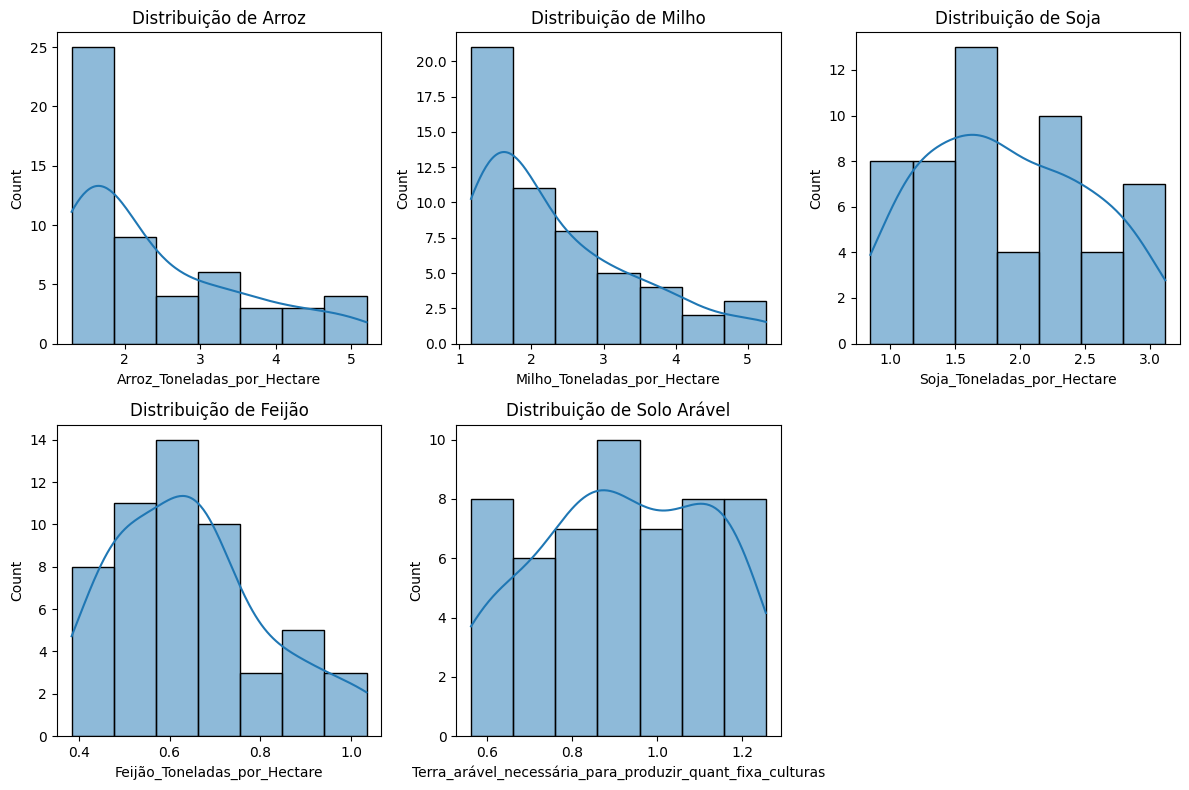

In [46]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(df_key_crop_yields_BR['Arroz_Toneladas_por_Hectare'], kde=True)
plt.title('Distribuição de Arroz')

plt.subplot(2, 3, 2)
sns.histplot(df_key_crop_yields_BR['Milho_Toneladas_por_Hectare'], kde=True)
plt.title('Distribuição de Milho')

plt.subplot(2, 3, 3)
sns.histplot(df_key_crop_yields_BR['Soja_Toneladas_por_Hectare'], kde=True)
plt.title('Distribuição de Soja')

plt.subplot(2, 3, 4)
sns.histplot(df_key_crop_yields_BR['Feijão_Toneladas_por_Hectare'], kde=True)
plt.title('Distribuição de Feijão')

plt.subplot(2, 3, 5)
sns.histplot(df_key_crop_yields_BR['Terra_arável_necessária_para_produzir_quant_fixa_culturas'], kde=True)
plt.title('Distribuição de Solo Arável')

plt.tight_layout()
plt.show()

In [47]:
df_key_crop_yields_BR.describe().drop('count')

,Year,Trigo_Toneladas_por_Hectare,Arroz_Toneladas_por_Hectare,Milho_Toneladas_por_Hectare,Soja_Toneladas_por_Hectare,Batata_Toneladas_por_Hectare,Feijão_Toneladas_por_Hectare,Ervilha_Toneladas_por_Hectare,Mandioca_Toneladas_por_Hectare,Cevada_Toneladas_por_Hectare,Cacau_Toneladas_por_Hectare,Banana_Toneladas_por_Hectare,Terra_arável_necessária_para_produzir_quant_fixa_culturas
mean,1987.500000,1.424380,2.415048,2.352915,1.901111,14.142361,0.644543,1.075643,13.129326,1.657087,0.445730,13.357233,0.919904
std,15.732133,0.625904,1.130950,1.115539,0.621056,6.702443,0.168620,1.122183,1.044605,0.815776,0.130951,2.277905,0.202266
min,1961.000000,0.423700,1.297400,1.160600,0.847800,5.648500,0.384200,0.000000,10.599600,0.590400,0.278800,10.159400,0.563289
25%,1974.250000,0.891975,1.515850,1.440975,1.402775,8.664625,0.503675,0.000000,12.312825,1.021500,0.333450,11.835275,0.760557
50%,1987.500000,1.438050,1.889150,1.869850,1.781000,13.254850,0.636300,0.623900,13.248400,1.526550,0.398650,12.915100,0.909849
75%,2000.750000,1.816400,3.198075,2.979325,2.367625,18.170100,0.709675,2.250100,13.994900,2.240775,0.549675,14.537125,1.119932
max,2014.000000,2.828800,5.201300,5.253600,3.121400,27.941000,1.034200,2.753000,14.827700,3.744100,0.741500,21.493800,1.255401


Análise feita, utilizando como plotagem Gráficos de linhas para os principais tipos de grãos mais produzidos no Brasil

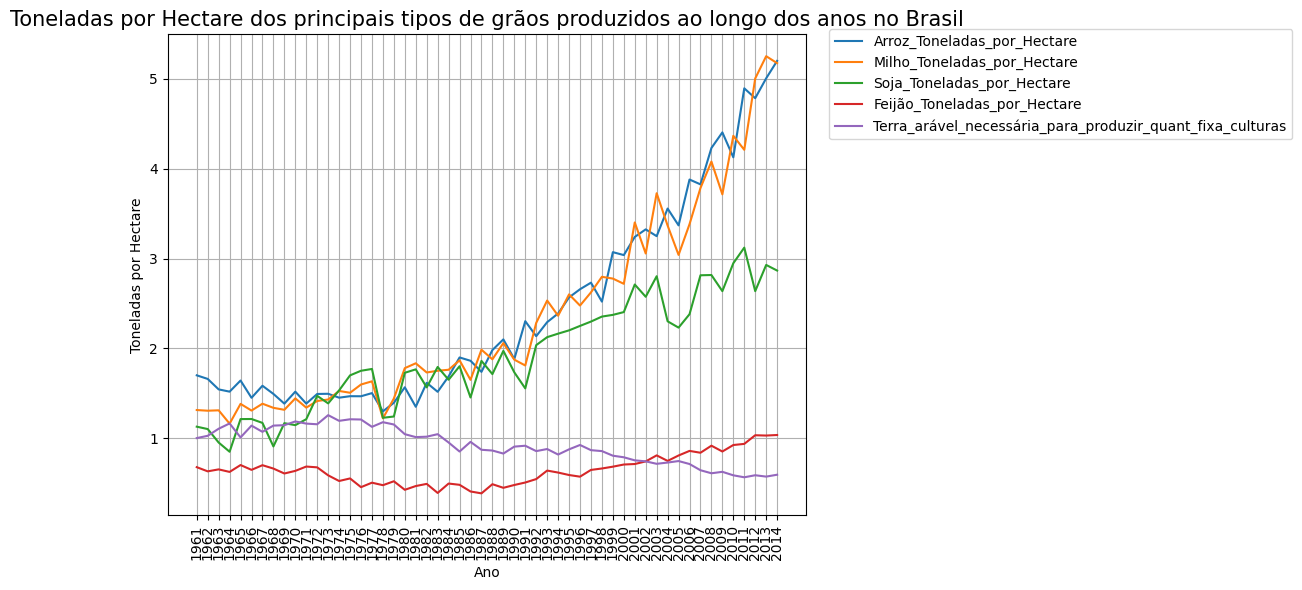

In [48]:
# Lista de colunas de grãos
graos_colunas = [ 'Arroz_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare',
                 'Soja_Toneladas_por_Hectare', 'Feijão_Toneladas_por_Hectare', 'Terra_arável_necessária_para_produzir_quant_fixa_culturas']

# Plotagem dos gráficos de linha para cada tipo de grão
plt.figure(figsize=(12, 6))
for graos_colunas in graos_colunas:
    sns.lineplot(data=df_key_crop_yields_BR, x='Year', y=graos_colunas, label=graos_colunas)

# Configurações do gráfico
plt.title('Toneladas por Hectare dos principais tipos de grãos produzidos ao longo dos anos no Brasil',fontsize=15)
plt.xlabel('Ano')
plt.ylabel('Toneladas por Hectare')
plt.legend(bbox_to_anchor=(1.025, 1.025), loc='upper left')
plt.xticks(df_key_crop_yields_BR.Year,rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Transformações de Dados

Podemos realizar a normalização dos dados utilizando o StandardScaler para padronizar as features:

In [49]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_key_crop_yields_BR[['Arroz_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare', 'Soja_Toneladas_por_Hectare', 'Feijão_Toneladas_por_Hectare', 'Terra_arável_necessária_para_produzir_quant_fixa_culturas']])
scaled_df = pd.DataFrame(scaled_data, columns=['Arroz_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare', 'Soja_Toneladas_por_Hectare', 'Feijão_Toneladas_por_Hectare', 'Terra_arável_necessária_para_produzir_quant_fixa_culturas'])
print("Dados Normalizados:")
print(scaled_df.head())


Dados Normalizados:
   Arroz_Toneladas_por_Hectare  Milho_Toneladas_por_Hectare  \
0                    -0.639173                    -0.941595   
1                    -0.674873                    -0.948382   
2                    -0.778941                    -0.944400   
3                    -0.801432                    -1.078860   
4                    -0.690850                    -0.879523   

   Soja_Toneladas_por_Hectare  Feijão_Toneladas_por_Hectare  \
0                   -1.258310                      0.188309   
1                   -1.301217                     -0.090047   
2                   -1.545334                      0.040451   
3                   -1.711925                     -0.128359   
4                   -1.120811                      0.330181   

   Terra_arável_necessária_para_produzir_quant_fixa_culturas  
0                                           0.399712          
1                                           0.525822          
2                                

# 3. Análise de Agregações



Análise de Tabela de Agregações dos dados referentes a média da quantidade de Toneladas por Hectare das colheitas relacionadas aos anos de 1961 a 2014

In [50]:

df_filtered = df_key_crop_yields_BR[df_key_crop_yields_BR['Year'].between(1961, 2014)]

dados_agregados = df_filtered.groupby('Year').agg({'Arroz_Toneladas_por_Hectare': 'mean', 'Milho_Toneladas_por_Hectare': 'mean',
                                                   'Soja_Toneladas_por_Hectare': 'mean','Feijão_Toneladas_por_Hectare': 'mean',
                                                   'Terra_arável_necessária_para_produzir_quant_fixa_culturas': 'mean'}).reset_index()
print("Agregação dos Dados por Ano (1961 a 2014):")
print(dados_agregados)

Agregação dos Dados por Ano (1961 a 2014):
    Year  Arroz_Toneladas_por_Hectare  Milho_Toneladas_por_Hectare  \
0   1961                       1.6989                       1.3123   
1   1962                       1.6589                       1.3048   
2   1963                       1.5423                       1.3092   
3   1964                       1.5171                       1.1606   
4   1965                       1.6410                       1.3809   
5   1966                       1.4487                       1.3066   
6   1967                       1.5828                       1.3828   
7   1968                       1.4919                       1.3369   
8   1969                       1.3838                       1.3149   
9   1970                       1.5169                       1.4421   
10  1971                       1.3840                       1.3393   
11  1972                       1.4914                       1.4130   
12  1973                       1.4933          

# 4. Análise de Correlação



Para que seja possível o plot do gráfico de calor (heat), primeiro devemos padronizar os dados de produção de grãos e a terra arável necessária para plantio.
Logo após a padronização, converteremos o resultado da padronização de volta em novo dataframe para que seja possível a leitura de seus dados.


In [51]:
# Padronização dos dados de produção de grãos e área arável necessária
scaler = StandardScaler()
df_key_crop_yields_BR_scaled = scaler.fit_transform(df_key_crop_yields_BR.iloc[:, 3:])

# Convertendo o resultado da padronização de volta em um DataFrame
df_key_crop_yields_BR_scaled = pd.DataFrame(df_key_crop_yields_BR_scaled, columns=df_key_crop_yields_BR.columns[3:])


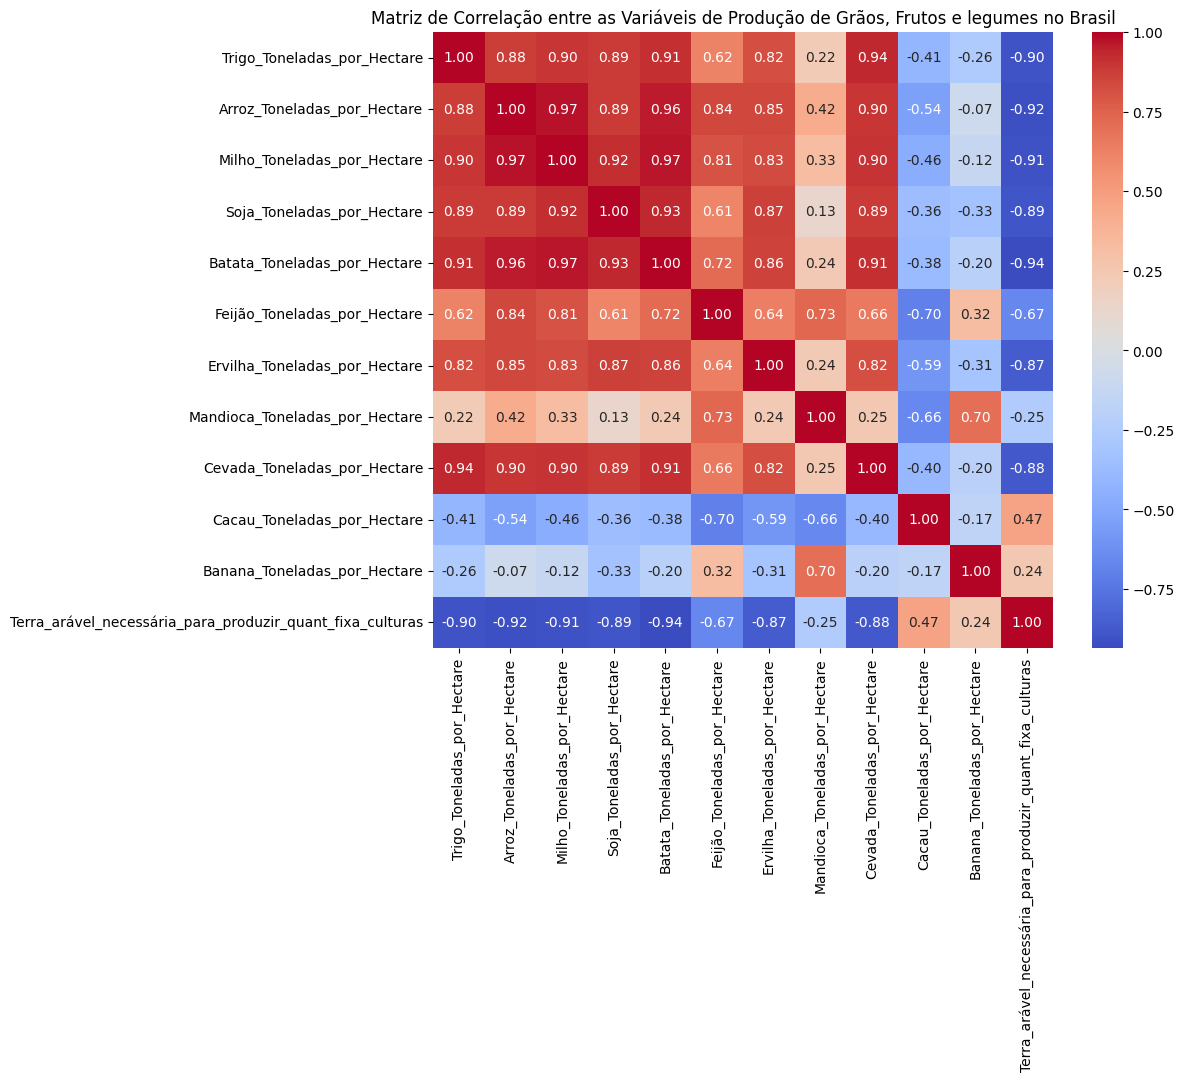

In [52]:
matriz_correlacao = df_key_crop_yields_BR_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre as Variáveis de Produção de Grãos, Frutos e legumes no Brasil')
plt.show()

Podemos calcular a matriz de correlação entre as variáveis de interesse:

In [53]:
correlacao_matriz_interesse = df_key_crop_yields_BR[['Arroz_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare', 'Soja_Toneladas_por_Hectare', 'Feijão_Toneladas_por_Hectare', 'Terra_arável_necessária_para_produzir_quant_fixa_culturas']].corr()
print("Matriz de Correlação:")
print(correlacao_matriz_interesse)


Matriz de Correlação:
                                                    Arroz_Toneladas_por_Hectare  \
Arroz_Toneladas_por_Hectare                                            1.000000   
Milho_Toneladas_por_Hectare                                            0.974398   
Soja_Toneladas_por_Hectare                                             0.885629   
Feijão_Toneladas_por_Hectare                                           0.844718   
Terra_arável_necessária_para_produzir_quant_fix...                    -0.918135   

                                                    Milho_Toneladas_por_Hectare  \
Arroz_Toneladas_por_Hectare                                            0.974398   
Milho_Toneladas_por_Hectare                                            1.000000   
Soja_Toneladas_por_Hectare                                             0.921861   
Feijão_Toneladas_por_Hectare                                           0.805286   
Terra_arável_necessária_para_produzir_quant_fix...              

Continuação do gráfico de calor acima, mas agora selecionando apenas as correlações mais fortes (acima de 0,5)

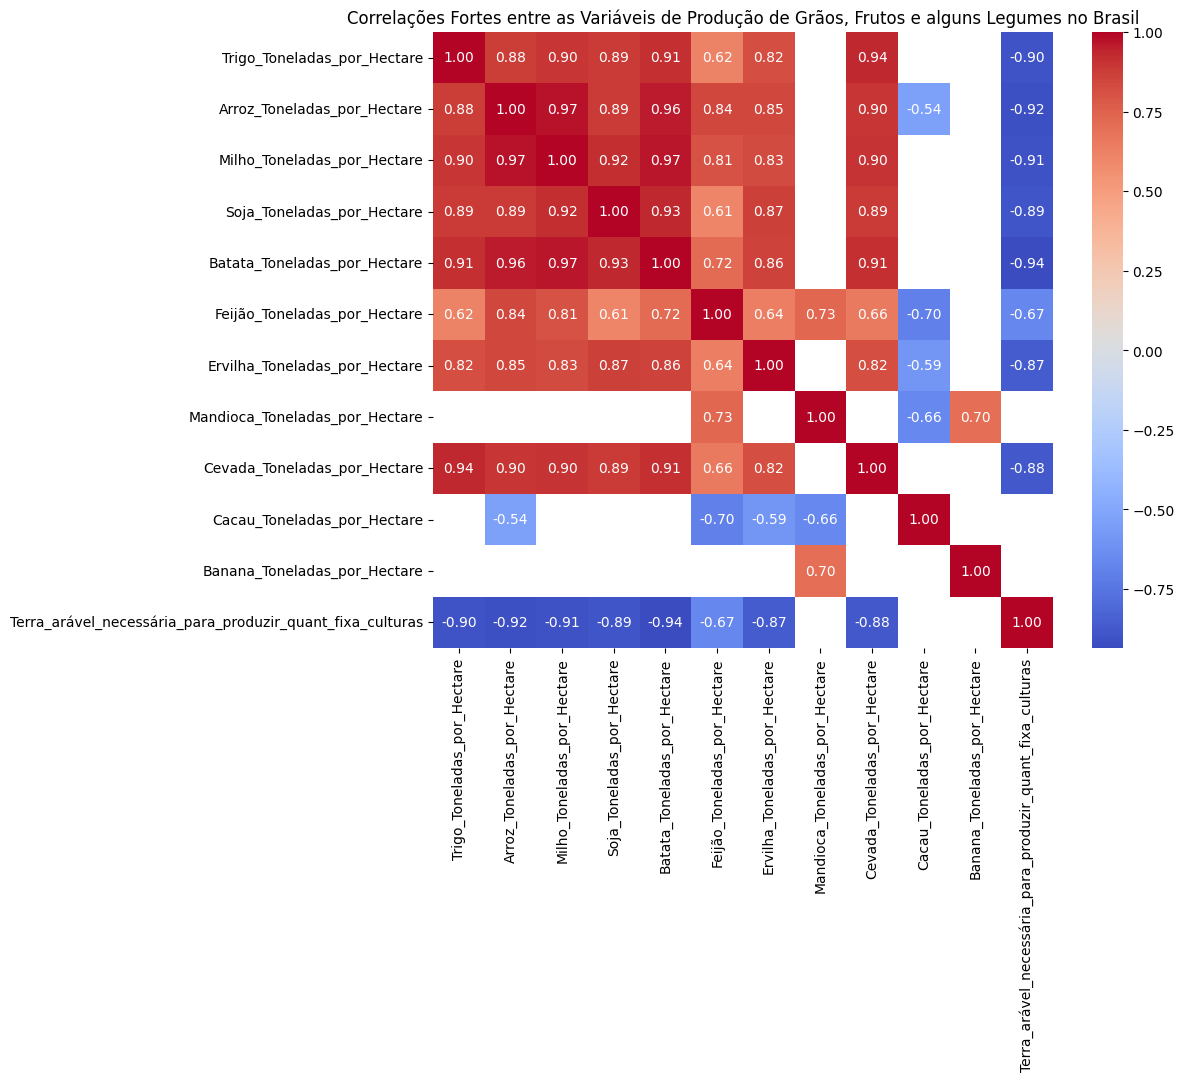

In [54]:
# Selecionando as correlações mais fortes (maiores que 0.5 em módulo)
matriz_correlacao_forte = matriz_correlacao[abs(matriz_correlacao) > 0.5]
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao_forte, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlações Fortes entre as Variáveis de Produção de Grãos, Frutos e alguns Legumes no Brasil')
plt.show()

# 5. Análise de Informação Mútua e Teste de Interdependência

Para uma análise de informação mútua, podemos usar o método mutual_info_regression do sklearn.feature_selection para calcular a informação mútua entre as variáveis.

In [55]:
from sklearn.feature_selection import mutual_info_regression

# Calcular a informação mútua entre cada feature e a quantidade de terra arável necessária
mi_scores = mutual_info_regression(df_key_crop_yields_BR[['Arroz_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare',
'Soja_Toneladas_por_Hectare', 'Feijão_Toneladas_por_Hectare']], df_key_crop_yields_BR['Terra_arável_necessária_para_produzir_quant_fixa_culturas'])
print("Informação Mútua entre as Variáveis:")
for i, score in enumerate(mi_scores):
    print(f"Variável {i+1}: {score}")

Informação Mútua entre as Variáveis:
Variável 1: 1.2746301534206148
Variável 2: 1.0762676332852188
Variável 3: 0.8123268306407061
Variável 4: 0.5961471437093855


Outra forma de análise é através do plot do gráfico em colunas em que pode ser demonstrada a interdependência das toneladas dos tipos de grãos, frutos e legumes durante o decorrer dos anos

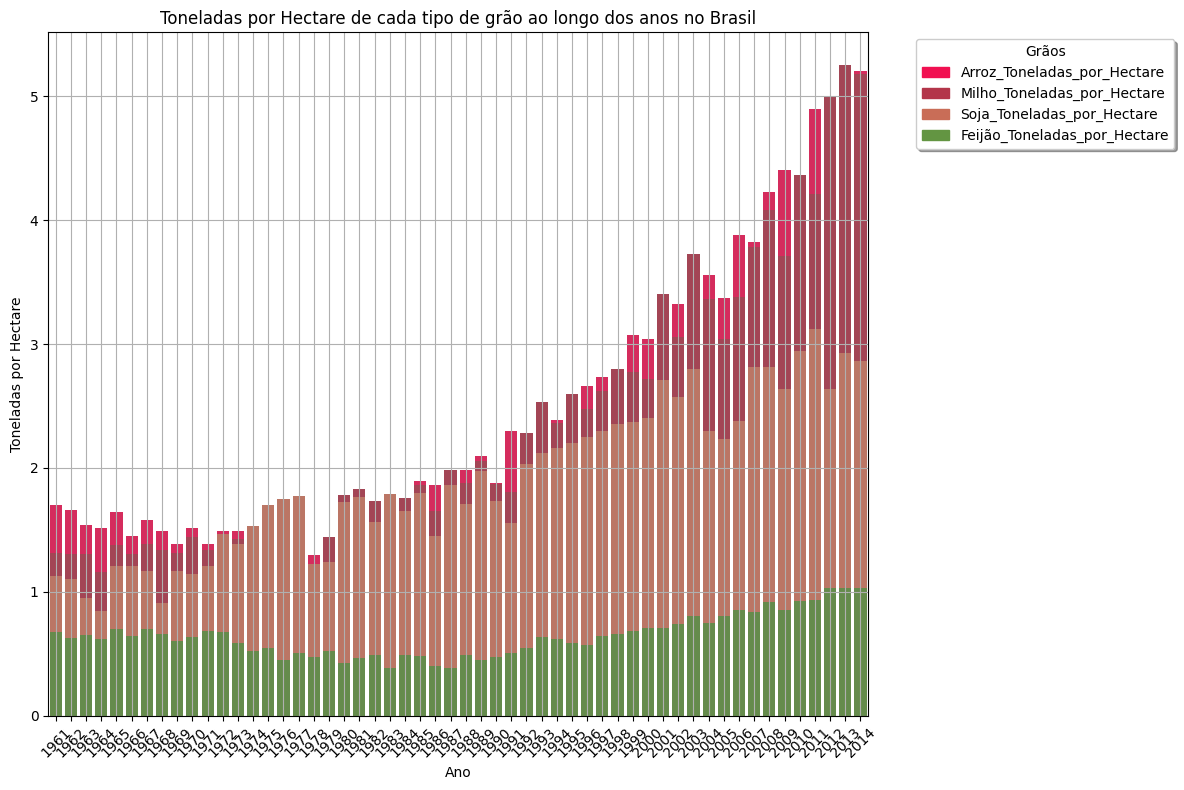

In [56]:
graos = ['Arroz_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare',
                   'Soja_Toneladas_por_Hectare', 'Feijão_Toneladas_por_Hectare']

cores = [np.random.rand(3,) for _ in graos]

plt.figure(figsize=(12, 8))
for i, (variable, cor) in enumerate(zip(graos, cores)):
    sns.barplot(data=df_key_crop_yields_BR, x='Year', y=variable, color=cor)

patches = [Patch(color=cor, label=grao) for cor, grao in zip(cores, graos)]

plt.title('Toneladas por Hectare de cada tipo de grão ao longo dos anos no Brasil')
plt.xlabel('Ano')
plt.ylabel('Toneladas por Hectare')

plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1.05, 1), title='Grãos', shadow=True)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()